![Boston,MA. View on town from Charles River riverside.](https://www.visittheusa.fr/sites/default/files/styles/hero_l_x2/public/images/hero_media_image/2017-06/de6f732d8950b74b550d885beab53c37.jpeg?itok=AHJDbUok)


# 1. Introduction:

Boston is one of the most historical towns of USA. As capital of state of Massachussets (a state worldly known for its MIT research center & its scientists/professors), it's naturally one of the largest cities in US.

* In this notebook, I'll give a prediction for Median value of houses (price) according to several parameters, that we'll see how to deal with them.

* Also, this project isn't a competitive, but mainly an educational one. I'll show you some errors that any newcomers to the world of data science could easily fail on & how to deal with them.

## Problem Description :

The boson housing price is a "classical for **prediction**" dataset. The objective is to predict the value of houses following certain variables.

The biggest issue to face is probably : which model to choose ?

Another questions would be : could other models be used to fit our problem ? or : How to deal with preprocessing ? (the most important part in any ML project).

Finally, even if our model is good. How to boost it ? (tuning hyperparameters).

So with no time loss, let's start the project !

#2. Data preprocessing & visualization

## Part 1: Data preparation

In this part, I'll do the usual things : Library importing, overviewing data & get a global idea about the problem.

In [ ]:
#importing usual libraries

#structural libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## dtreeviz 
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import sys
import os

## plotly output issue
from plotly.offline import iplot, init_notebook_mode
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
      <script src="/static/components/requirejs/require.js"></script>
      <script>
        requirejs.config({
          paths: {
            base: '/static/base',
            plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
          },
        });
      </script>
      '''))

# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

# preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# models libraries (classification)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# models libraries (regression)
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## additional regressors 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR
from sklearn.svm import SVR

# metrics libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics, svm

# tuning/boosting libraries
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV

# cross-validation & shuffling libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

# dataset loading libraries
from sklearn.datasets import load_boston
from google.colab import files

     |████████████████████████████████| 61kB 4.2MB/s 


In [ ]:
print("Choisissez le fichier boston.csv")
uploaded = files.upload()

Choisissez le fichier boston.csv


Saving boston.csv to boston.csv


After uploading the data, I'll see a sample from it by using the following code.

In [ ]:
data = pd.read_csv("boston.csv")
data.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

Here below is a detailled description about each variable (feature) of the dataset.

In [ ]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Next, see the features & some interesting information about them:
* Count : number of values in a feature.
* mean : aritmetic mean of a feature values.
* std : standard deviation of each feature value.
* min : minimal value of the feature.
* max : maximal value of the feature.
* quantiles : Important to determine IQR that I'll use later to deal with outliers.

In [ ]:
data.describe()

CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

The type of each feature. Also number of not nan values in each variable & its type.

Sometimes, the true type of a feature isn't necessary what is needed to process with, & we need to change its type either by encoding it, or assigning directly the nature of type (transforming). I'll give that later on, in the preprocess step.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Then, see the number of nan or null values for each feature. In this dataframe, we don't have any nan or null value as seen below.

In [ ]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Part 2: Some visualization

After seeing the global dataset, let's do some visualization to understand it better.

I'll start by some boxplots:

* ***Boxplot*** is a great kind of plot that not only give us some distribution of data points, but also gives us some points considered as *outliers*.

Before continuing, let's recall that some ML models are very sensitive to outliers, so dealing with them before any further data exploratory is greatly recommanded.

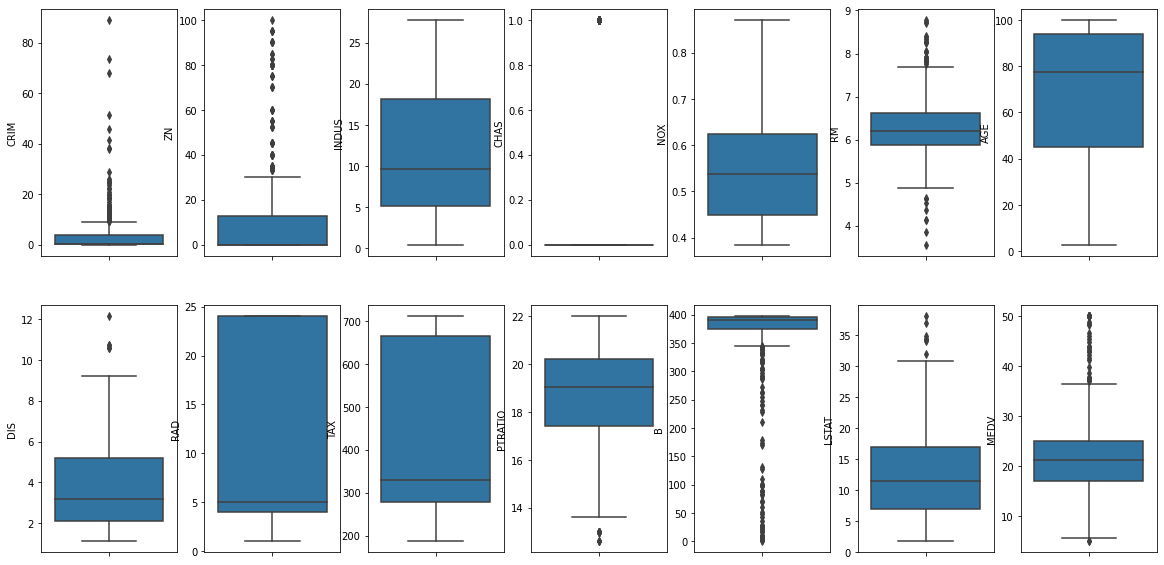

In [ ]:
# Data boxplots
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1

### Interpretation of the boxplot figures

* **CRIM**: Overall, Crim rate is relatively low (with a mean of only 3.61%)
* **ZN**: Low residential zones in biggest areas (over 25.000 sq.ft) with a mean of 11.13
* **CHAS**: Most residentials don't bound Charles river -CHAS- (as tracting bound value == 1 is considered as outlier).
* **AGE**: People living are mostly old. with a an AGE between 45 y.o (Q1) & 94 y.o (Q3)
* **PTRATIO**: We have a decent ratio of 1 teacher per 18-19 pupils.
* **B**: We have a big community of african american people.
* **LSTAT**: Relatively weak lower status of population (mean of 12.65%).
* **MEDV**: 220.000$ is the average value of owned-occupied homes. (will be the target feature to predict).

### Dealing with outliers:

Remember when I talked about the quantiles earlier ? These are very important to measure the outliers proportion.

From many methods to do so, the one implying quantiles is the most popular.

But that's not all. As I said before, this project is purely educational. That's why I added a *BIG error* that some of us; data science beginners could fall into : **Dataset size**.

I intentionally did the following method to detect & remove outliers by the quantile way. But the error is that this method is super efficient when we have a very sizeable big dataset, when outliers is around 100-200 in a data set of 100k pts this is great, but when in this boston house dataset case, we'll see that it's absolutely a thing to avoid.

In [ ]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

#Detecting & removing outliers (pts that are outside (Q1-1.5 * IQR) & (Q3+1.5* IQR)
data_cleaned = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

Using that method really hurts when data is very small like the one I'm working in this project.

As you can see below, the shape of the dataframe had been halved, which is affecting the results hugely when modelizing the ML algorithm for the prediction.

In [ ]:
data_cleaned.shape

(268, 14)

A comparison between the boxplots after removing the outliers. Some notes:
* **ZN**: nearly null.
* **CHAS**: All rows with CHAS==1 (tracting bounds of river) now disappeared. We'll deal only with data of not besided by the river.
* To sum it up: *major* changes for features that had "big number of outliers" in the dataset. Meanwhile, those that didn't had outliers or very few (such **AGE**) *stood as they were*.

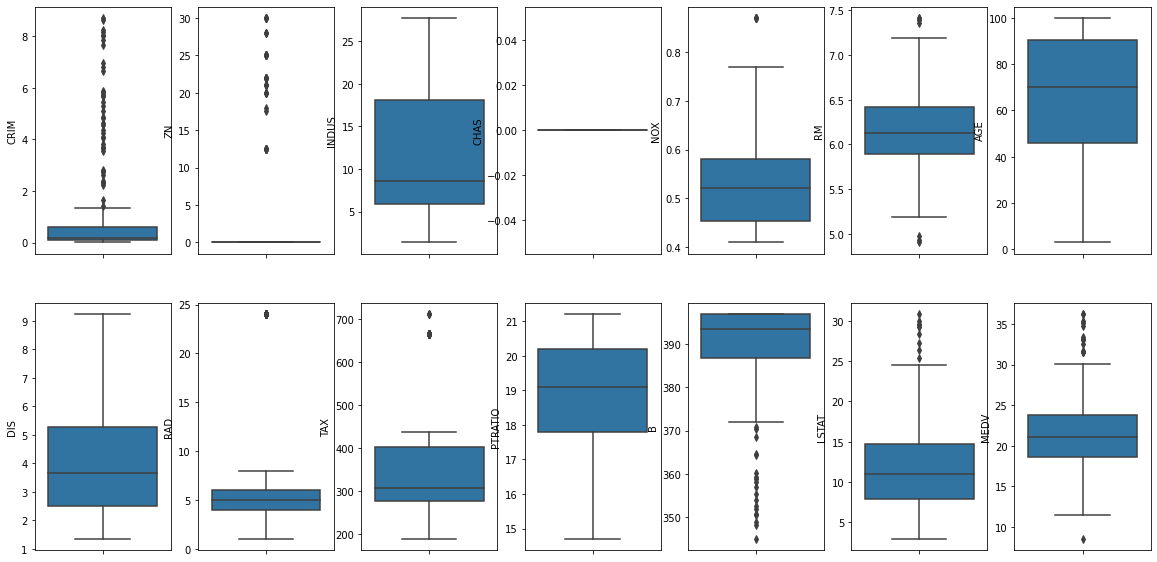

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data_cleaned.items():
    sns.boxplot(y=k, data=data_cleaned, ax=axs[index])
    index += 1

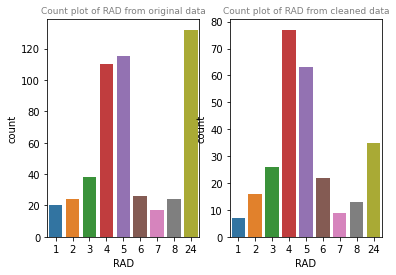

In [ ]:
#Comparative countplots of RAD between original_data & cleaned_data

fig, (ax1,ax2) = plt.subplots(1,2)
sns.countplot(data=data, x='RAD',ax=ax1)
ax1.set_title('Count plot of RAD from original data', color='grey', fontsize=9)

sns.countplot(data=data_cleaned, x='RAD',ax=ax2)
ax2.set_title('Count plot of RAD from cleaned data', color='grey',fontsize=9)
fig.show()

From above, we can clearly see the counts difference between RAD == [4,8,24] for cleaned & original data.

From below, we can see that ther's no regression line for cleaned data of **CHAS** & the slightly different regression line for CRIM between cleaned & original data.

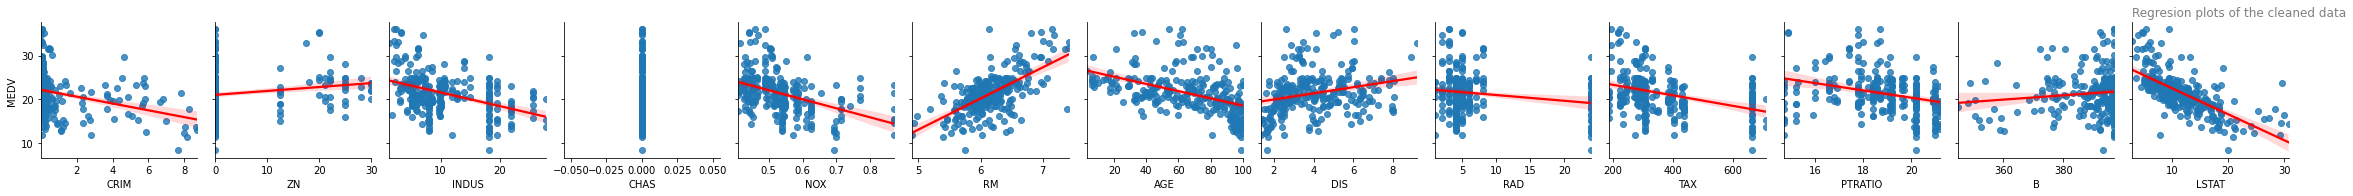

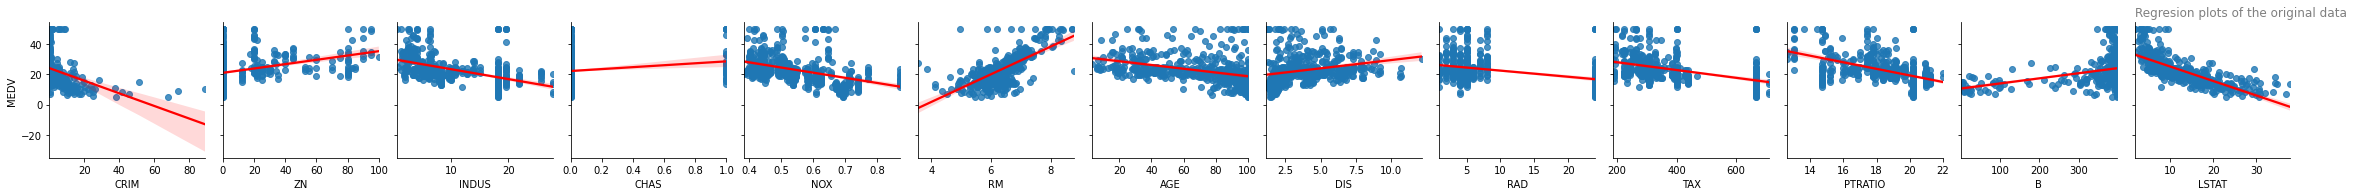

In [ ]:
# Another comparative pairplots between original & cleaned data for target(MEDV) feature & all other features (with the regression line)

sns.pairplot(data=data_cleaned, x_vars=data_cleaned.drop('MEDV', axis=1), y_vars=['MEDV'], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.title(label='Regresion plots of the cleaned data', color='grey', loc='left')

sns.pairplot(data=data, x_vars=data.drop('MEDV', axis=1), y_vars=['MEDV'], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.title(label='Regresion plots of the original data', color='grey', loc='left')

plt.show()

## Part 3: Data Encoding

As I said in the beginning, not all features are from the original type, & sometimes it it necessary to deal with them by either encoding or assigning them to another types.

In this dataset, clearly **CHAS** is a categorical data, it's encoded as 0 if the residential isn't bordered by river & 1 if it's the case.

So here, we need to assign that feature as " *categorical* ". Also, the **RAD** described as an index of radial highways accessibility, it's logically an *ordinal* feature.

I'll do some encoding & type changing to our data.


In [ ]:
# Encoding features.

#avoid SettingCopyWarning.
pd.options.mode.chained_assignment = None  # default='warn'

# For cleaned data
data_cleaned['CHAS'] = data_cleaned['CHAS'].map({1 : 'Yes', 0 : 'No'}) #method 1
data_cleaned['CHAS'] = data_cleaned['CHAS'].astype('category').cat.codes #method 2
data_cleaned['RAD'] = data_cleaned['RAD'].astype('category')

# For original data
data['CHAS'] = data['CHAS'].map({1 : 'Yes', 0 : 'No'}) #method 1
data['CHAS'] = data['CHAS'].astype('category').cat.codes #method 2
data['RAD'] = data['RAD'].astype('category')

categorical_features = data_cleaned.dtypes[data_cleaned.dtypes == 'category'].index
print("categorical_features are :",categorical_features)

# since the CHAS variable is no more interesting (only of not river bordered are in it) we can drop it. (case of cleaned_data)
data_cleaned = data_cleaned.drop('CHAS', axis=1) #for cleaned data
data = data.drop('CHAS', axis=1) #for original data

categorical_features are : Index(['RAD'], dtype='object')


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     268 non-null    float64 
 1   ZN       268 non-null    float64 
 2   INDUS    268 non-null    float64 
 3   NOX      268 non-null    float64 
 4   RM       268 non-null    float64 
 5   AGE      268 non-null    float64 
 6   DIS      268 non-null    float64 
 7   RAD      268 non-null    category
 8   TAX      268 non-null    float64 
 9   PTRATIO  268 non-null    float64 
 10  B        268 non-null    float64 
 11  LSTAT    268 non-null    float64 
 12  MEDV     268 non-null    float64 
dtypes: category(1), float64(12)
memory usage: 37.9 KB


In [ ]:
numeric_features = data_cleaned.dtypes[data_cleaned.dtypes != "category"].index
print('Numerical_feature are :', numeric_features)

Numerical_feature are : Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'MEDV'],
      dtype='object')


### Correlation map:

Now, after sorting features by numerical & categorical types, I'll procede to see the correlation between features.

The heatmap of *correlation* is as follows:

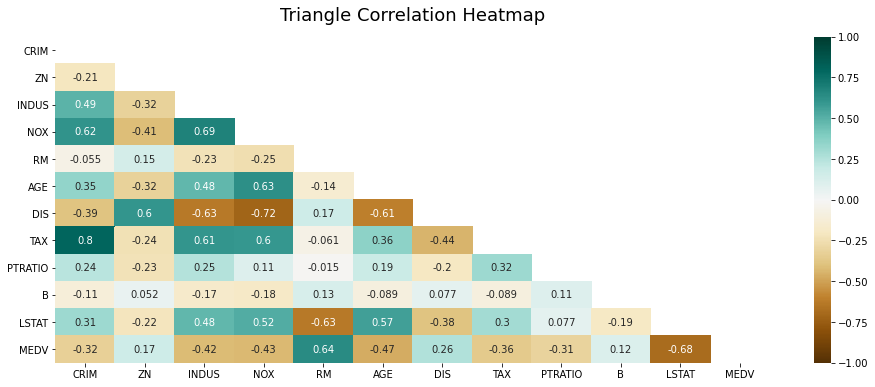

In [ ]:
# For the cleaned data

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_cleaned.corr(), dtype=np.bool))
heatmap = sns.heatmap(data_cleaned.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

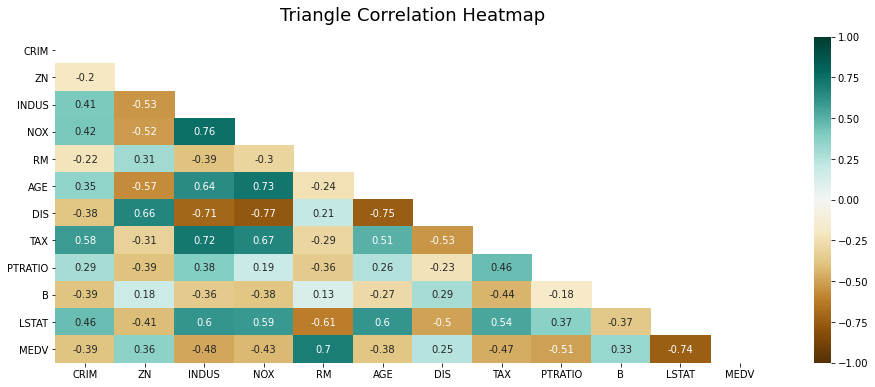

In [ ]:
# For the original data

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Some infos from correlation:

* An intuitive way for feature selection is to select features with highest correlation with target feature. In this case, we can tell that RM, PTRATIO & LSTAT are the most important ones (all have more than $|0.5|$ correlation index in the original data.

<u>**Note**</u>: There's another method which is way more efficient & often used in ML competitions : BOOSTS (XGBoost, CatBoost, LightGBM).

* A house with more rooms have naturally higher price.
* A lower PT ratio means also a higher house price. (1 teacher per 12 pupils offers more educational stability than a 1 teacher per 18 pupils -Over charged classrooms means lower house prices as shown by the negative correlation-)
* The higher Lower status of people (**LSTAT**) in area, the lower is the **MEDV**.

* More property taxe rate (**TAX**) lower is the **MEDV**.
* Higher is the lvl of air pollution (**NOX**) lower is **MEDV**

#3. Data Modelization:

## Part 1 : Selecting the model type

Now that we got the main idea after a deep data exploratory; I'll procede to the modelization of the data.

The problem identified here, is to build a ML model that predict price of houses (**MEDV**) based on features we saw.

Since this is a supervised ML problem, than we have 2 methods to do so:

1.   Regression
2.   Classification

Now which one to choose ? & more over: Is there a difference in using each method ?

Let's check this out !

### Train-Test Split

To start with, I'll use the usual train-test split steps for data_cleaned, With a feature selection of target which is **MEDV**.

In [ ]:
# Train-Test split step:

X = data_cleaned.drop(['MEDV'], axis=1)
y = data_cleaned['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

print(X.shape, y.shape)

(268, 12) (268,)


Next, we encounter our first problem: Some of the models I wanted to use seems unfit to our problem.

* The first problem is the type of target: **MEDV** is float. This means we can't use a classification model here, as both *KNN* & *Logistic Regression* are mainly used for the discrete variable cases.

So the only remaining model is *Regression method*

* Then, the 2nd problem I encountered here is : if I use only the regression model, then what about comparison with other models (to select the best model between 2 or more).

### Resolving problems

In fact, to resolve the 1st problem we have 2 ways :

1.   Transforming our float type target into int type, then procede as usual.
2.   In case we want to use the with the continuous case, we need to use some very advanced techniques requiring deep learning knowledge & keras library. (These aren't in our reach level right now).

For the 1st way, I used an advanced technique of *label encoding* that solved the problem.

But then, the new values created another problem when using the classification later. That's why it's recommanded to avoid that way that I made just below (for demonstration purposes only).

For 2nd way, it's not at my aknowledge level at this time. So simply avoid it too.

The best way would be to transform the target type directly into discrete case. This is doable by simply multiplying the target values to 10 then assign their type as 'int' (using 'astype' function for example).

In [ ]:
#label encoding both y_train & y_0_test to use for classification models.

lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
print(y_train_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded))

lab_enc = preprocessing.LabelEncoder()
y_test_encoded = lab_enc.fit_transform(y_test)
print(y_test_encoded)
print(utils.multiclass.type_of_target(y_test))
print(utils.multiclass.type_of_target(y_test.astype('int')))
print(utils.multiclass.type_of_target(y_test_encoded))

[ 80  89   4  86  90   9  92  99  46 104  16  65  95  46   0  73  55  26
  56  24  72  57  63  63 116  31  19  73  84  55  81  37  58  48  35  83
  78  39  91 117  18  85   3  10  42  62  57  77  84  53 114  52 104 101
   7  28  53  44  34  75  41  70  89   9  66 104  62  70  95  82  62  29
  39  40  95 106 100  57  86  40  67  96 109  38  89  85  62  98  64   2
 107  40  54  42 110 106  79  11  52  54  94  88  80  94  45  33  13  56
  79  59  80  36  73 111  68  78  95 108  55  42  46  32  49   8 115 105
  93  83  17  18  81  61  60  25  30  49  54  92  77  22 102  62  27  22
  58   5 117  97  12 103  76  43  50  66  47  70  93  47  72  23  68  33
  53  61 109  71  33  95  47  68  76  20  91  50  90  79 113  36  82  44
  14  60  21   1  20  63  51  87  67  70  74  38  69  46 112  60  76   6
  38  99  45  56  73  21  37  16   8  57  23  29  70  85  95  15]
continuous
multiclass
multiclass
[10 28 11  8 25 26  1  6 33 38 17 35 10 28 17 11  0 10 32 34 27 18 29 12
 16 22 27 17 21 36 22 19 

### Pipelines

After doing the encoding I created some pipelines for data_cleaned to fit various models & then to test their accuracy for each model.

In [ ]:
# using standardscaler for data preprocessing 
# Logistic Regression 
pipeline_lr= Pipeline([('sc1',StandardScaler()),
                       ('lr_classifier',LogisticRegression())])

# decision tree
pipeline_dt= Pipeline([('sc2',StandardScaler()),
                       ('dt_classifier',DecisionTreeClassifier())])

# Randomforest classifier 
pipeline_randomforest= Pipeline([('sc3',StandardScaler()),
                                 ('rf_classifier',RandomForestClassifier())])

#KNN 
pipeline_KNN= Pipeline([('sc4',StandardScaler()),
                        ('KNN',KNeighborsClassifier())])

# Regression

pipeline_lin_reg= Pipeline([('sc5',StandardScaler()),
                            ('lin_regression',LinearRegression())])

## Polynomial
pipeline_poly_reg= Pipeline([('sc5',StandardScaler()),
                             ('degree',PolynomialFeatures(degree=3)),
                             ('lin_regression',LinearRegression())])

I created a list of pipelines & a dict for each to apply for accuracy of each model.

In [ ]:
# Make the pipelines in a list 
my_pipelines = [pipeline_lr,pipeline_dt,pipeline_randomforest,pipeline_KNN, pipeline_lin_reg, pipeline_poly_reg]
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'KNN', 4:'Linear Regression', 5:'Polynomial Regression'}
# fit the piplines 
for pip in my_pipelines:
  pip.fit(X_train, y_train_encoded)

Then we calculate accuracy scores for each model :

In [ ]:
# Accuracy for each model 
def accuracy():
  for v,model in enumerate(my_pipelines):
    print("{} Test Accuracy is: {}".format(pipe_dict[v],model.score(X_test,y_test_encoded)))
accuracy()

Logistic Regression Test Accuracy is: 0.0
Decision Tree Test Accuracy is: 0.0
RandomForest Test Accuracy is: 0.018518518518518517
KNN Test Accuracy is: 0.018518518518518517
Linear Regression Test Accuracy is: -18.18572772120872
Polynomial Regression Test Accuracy is: -35.46549773832442


#### Lecture of results

These scores seems either very low or negative (weird huh ?!).
I'll explain that later, for now, let's just take the example of a random forest. As we can see below, even with a parameters change, the result is still the same: an accuracy of less than 2%. 

In [ ]:
# Randomforest classifier 
pip_rf= Pipeline([('rf_classifier',RandomForestClassifier(n_estimators=400, random_state=0))])

Now we'll see a bunch of predictions with the encoding method I used earlier. The objective is to use that result to create a confusion matrix (that will be very confusing).

In [ ]:
pip_rf.fit(X_train, y_train_encoded)

preds = pip_rf.predict(X_test)

print(preds)

[ 43  95  52  31 109  95   5  50  94 104  70  90  53  83  36  30  13  48
  93  96  73  61  81  54  42  55  36  54  84  95  81  70  56   7   7  62
  38  95   8 104  46  90  88  28  27  85  55  58  21  70  94  36  45  68]


In [ ]:
accuracy_score(y_test_encoded,preds)

0.018518518518518517

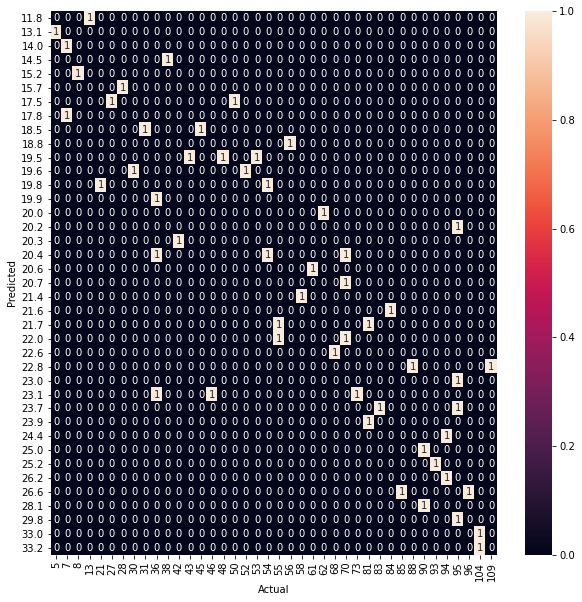

In [ ]:
plt.figure(figsize=(10,10))
confusion_matrix = pd.crosstab(y_test, preds, rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True)

What we can say is that predicted & actual values are not from same type. That's true, because we used the encoding that transformed continuous to discrete values of the target feature (**MEDV**).

But this isn't the main problem: another remark, is that we have a 'bin' of predicted that doesn't match the one with actual.

In [ ]:
print(classification_report(y_test_encoded, preds))
from sklearn.metrics import f1_score
metrics.f1_score(y_test_encoded, preds, average='weighted', labels=np.unique(preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



0.04444444444444444

The classification report shows us that classification isn't good & suited for this kind of problem.

<u> ***Note***</u> : To use classification, we could have created classes consisting of bins of target feature (using qcut sklearn's function), labelizing them then study the classification of each bin.

I didn't used this method for 2 main reasons :

* Proceeding like that means more work to do & its very relative to bin sizes or number of bins.
* Given the already made accuracy, this method won't boost it a lot (though I didn't tested it).
* Main reason : bins means more compacted data & less data points, which lead to a great loss in data informations. That's why it's very risky way to use.

The results above seems weird, but they gives us 2 main infos:
* This problem isn't suited for ***classification***.
* The ***linear regression*** isn't correctly used with all those operations. It returns the coefficient of determination or R² instead of the accuracy. To resolve that, we'll use the metric score for regression in the upcoming part.

## Part 2: How to build the correct model

To procede this correctly, I'll use original data since it's more 'cleaned' than cleaned_data. (explained it above)

First of all; I changed the dtype of the target to 'int'. It's useful for many reasons, one of them is it suits better & has a lower complexity than a continous (float) dtype. You should note than by multiplying the target by 10 (to make it fit for 'int' dtype change), we mustn't forget description of features, where now, the **MEDV** is counted for x100 instead of x1000 -in $- .

To start this more accurate method, I used regressors instead of classifiers that we saw they were unsuited for our problem.

Doing as I did before (same steps); except that now we'll use ***REGRESSORS*** method which is the most fit to the problem.

In [ ]:
# transorming dtype from float to int.
data['MEDV'] = 10 * data['MEDV']
data['MEDV'] = data['MEDV'].astype(np.int64)
data['MEDV'].dtype # proof of changing type.

# train_test split for original data:
X = data.drop(['MEDV'], axis=1)
Y = data['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

In [ ]:
# pipelines
# using standardscaler for data preprocessing 

# decision tree
pipeline_dt= Pipeline([('dt_classifier',DecisionTreeRegressor())])

# Randomforest classifier
pipeline_randomforest= Pipeline([('rf_classifier',RandomForestRegressor(n_estimators=100, criterion='mse'))])

#KNN 
pipeline_KNN= Pipeline([('KNN',KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=5, metric='minkowski'))])

# Regression

## Linear
pipeline_lin_reg= Pipeline([('sc5',StandardScaler()),
                            ('lin_regression',LinearRegression())])

## Polynomial
pipeline_poly_reg= Pipeline([('sc5',StandardScaler()),
                             ('degree',PolynomialFeatures()),
                             ('lin_regression',LinearRegression())])

In [ ]:
# Models dictionary & pipelines list

pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'KNN', 4:'Linear Regression', 5:'Polynomial Regression'}
my_pipelines = [pipeline_lr, pipeline_dt,pipeline_randomforest,pipeline_KNN, pipeline_lin_reg, pipeline_poly_reg]
for pip in my_pipelines:
  pip.fit(X_train, Y_train)

In [ ]:
# Accuracy for each model 
def accuracy():
  for v,model in enumerate(my_pipelines):
    Y_pred = model.predict(X_test)
    print("{} MSE is: {}".format(pipe_dict[v],round(mean_squared_error(Y_test,Y_pred),2)))
    print("{} R^2 is: {}".format(pipe_dict[v],round(metrics.r2_score(Y_test,Y_pred),3)))
    print('{} R squared training is: {}'.format(pipe_dict[v],round(model.score(X_train,Y_train),3)))
    print('{} R squared testing is: {}\n'.format(pipe_dict[v],round(model.score(X_test,Y_test),3)))

accuracy()

Logistic Regression MSE is: 5558.74
Logistic Regression R^2 is: 0.137
Logistic Regression R squared training is: 0.267
Logistic Regression R squared testing is: 0.02

Decision Tree MSE is: 2662.51
Decision Tree R^2 is: 0.587
Decision Tree R squared training is: 1.0
Decision Tree R squared testing is: 0.587

RandomForest MSE is: 1256.98
RandomForest R^2 is: 0.805
RandomForest R squared training is: 0.983
RandomForest R squared testing is: 0.805

KNN MSE is: 4181.41
KNN R^2 is: 0.351
KNN R squared training is: 1.0
KNN R squared testing is: 0.351

Linear Regression MSE is: 1651.85
Linear Regression R^2 is: 0.744
Linear Regression R squared training is: 0.73
Linear Regression R squared testing is: 0.744

Polynomial Regression MSE is: 2274.49
Polynomial Regression R^2 is: 0.647
Polynomial Regression R squared training is: 0.928
Polynomial Regression R squared testing is: 0.647



### Lecture of results

Now the results are way more clear, remember that lesser MSE is, better is the model.

In other hand, $\mathrm{R}^2$ is a statistical measure of the quality of the regression (not a model's accuracy actually).

To really sort out the best regression model to use, a deep statistical study & tools are necessary to pick the final choice (could be used with statsmodels.api library with import statsmodels.api as sm).

But to our level, those primary tools -$\mathrm{R}^2$ & MSE- are more than enough for the decision.

Back to our results : I could tell that the linear & Random Forest regressor are the best models to pick for our data modelization.

### Example of model building (visualization)

Now as example, I used the polynomial model. With degree 4, I calculated the polynomial regression for each degree (linear(degree = 1) to degree = 4).

For visualization, I took target predictions as y variable & **LSTAT** feature as x variable. The colors are representing the **RAD** feature. 

In [ ]:
# display the plotly offline_mode
configure_plotly_browser_state()
init_notebook_mode(connected=False)

Y_pred = pipeline_poly_reg.predict(X_test)
def format_coefs(coefs):
    equation_list = [f"{coef}x^{i}" for i, coef in enumerate(coefs)]
    equation = "$" +  " + ".join(equation_list) + "$"

    replace_map = {"x^0": "", "x^1": "x", '+ -': '- '}
    for old, new in replace_map.items():
        equation = equation.replace(old, new)

    return equation

X = data.LSTAT.values.reshape(-1, 1)
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

fig = px.scatter(data, x=X_test['LSTAT'], y=Y_pred, color = X_test['RAD'], labels={'x':'LSTAT', 'y':'MEDV'}, opacity=0.65,
                 title='Polynomial regression for degrees [1,4]')

for degree in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree)
    poly.fit(X)
    X_poly = poly.transform(X)
    x_range_poly = poly.transform(x_range)

    model = LinearRegression()
    model.fit(X_poly, Y)
    y_poly = model.predict(x_range_poly)

    equation = format_coefs(model.coef_.round(2))
    fig.add_traces(go.Scatter(x=x_range.squeeze(), y=y_poly, name=equation))

fig.show()
plt.savefig("Polynomial regression.svg")

<Figure size 432x288 with 0 Axes>

### Building the model

Next step is to build a model of our regression. Since the Random forest offered the best results, I decided to build that model & visualize it.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


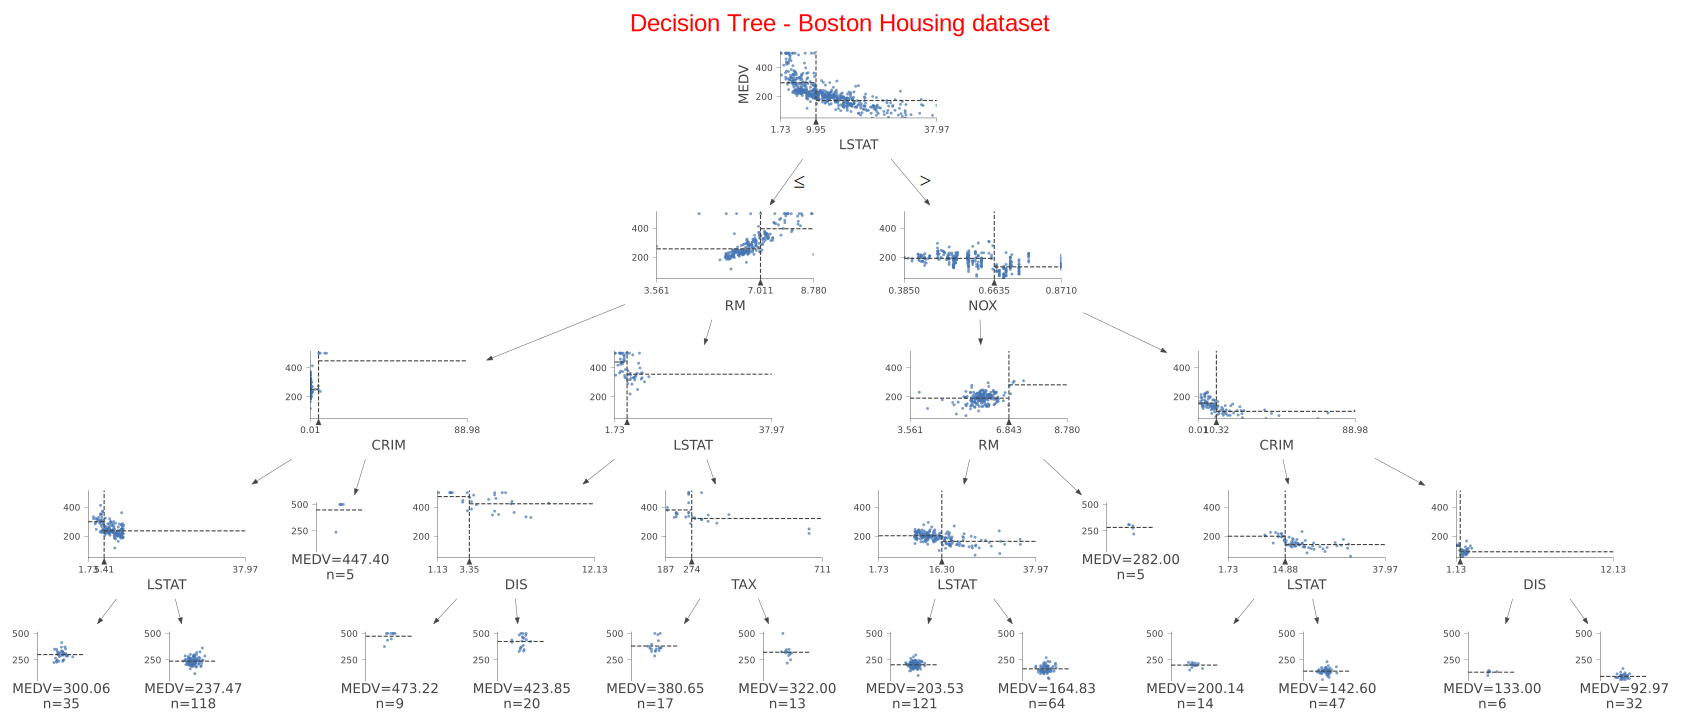

In [ ]:
import matplotlib.font_manager # Fixed some font (Arial) issue
from dtreeviz.trees import dtreeviz

#model1 = tree.DecisionTreeClassifier()
#model1.fit(X_train, Y_train)

X = data.drop(['MEDV'],axis=1)
Y = data.MEDV

reg = RandomForestRegressor(n_estimators=100,
                            max_depth=4,
                            max_features='auto',
                            min_samples_leaf=4,
                            bootstrap=True,
                            n_jobs=-1,
                            random_state=0)
reg.fit(X, Y)

viz = dtreeviz(reg.estimators_[0], X, Y,
               target_name='MEDV',
               feature_names=X.columns.tolist(),
               title="Decision Tree - Boston Housing dataset",
               title_fontsize=16,
               colors = {"title":"red"},
               scale=1.5)

viz.save("decision_tree_house.svg")
viz

This datatree (from the random regressor we builded in the code) shows exactly why it's efficient : It confirms the importance of the features we talked about above (RM, LSTAT).

For example, let's take leaf 26 (right's most). The split of nodes till the last leaf was made according to **LSTAT** (lower status %) **NOX** (air pollution indicator), **CRIM** (criminality), **DIS** (weighted distance from work places) features. We have all node/leaf splits greater than the split point value. To sum it up : Higher (**LSTAT**, **NOX**, **CRIM**, **DIS**) implies a lower House price -**MEDV**-. That means the prediction is pretty accurate

We could use the correlation map to confirm those leafs/nodes results.

#### Tuning Hyperparameters using GridSearch

Now that we choosed the model to use, another question comes in : Could it be better if we change some of it parameters ? The logical answer would be 'Yes', but then; how could we do that ? Answer : Gridsearch library.

In this example, I used one of the most famous boosting methods (to raise accuracy & efficience of the model) called ***XGBoost*** (the regressor method, since our problem is a regression type).

Then I linked it to Gridsearch (a method to adjust parameters to find ones that offer the *best* efficiency to our model).

#### XGBoost + Gridsearch (Example)

In [ ]:
# to show operation timer
now = datetime.datetime.now()

# train_test split step
X = data.drop(['MEDV','RAD'],axis=1)
Y = data.MEDV

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4,10], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.4,0.7],
              'colsample_bytree': [0.05,0.7],
              'n_estimators': [100,500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,Y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 288 out of 288 | elapsed:  1.7min finished


0.873828299395301
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


### Cross validation & K-Fold

As seen during formation; sometimes, the train_test split doesn't offer best scores as it's not enough ***'Randomized'***. That's why the cross validation comes in handy.

Below is a simple example of scores for our data using a GBR (Gradient Boosting Regressor) model with a cross validation.

In [ ]:
gbr_model = GradientBoostingRegressor()
kf = KFold(n_splits=5, shuffle=True)
score_ndarray = cross_val_score(gbr_model, X, Y, cv=kf)
print('Scores for each fold are: ',score_ndarray)
print('The score of the cross validation is: ',score_ndarray.mean())

Scores for each fold are:  [0.89788334 0.88500106 0.88967882 0.8922332  0.90349156]
The score of the cross validation is:  0.893657594252345


### Final operation : Summarizing Regression models scores

Now I'll apply some of regression models to see which gives the best scores. The objective isn't to compare regressions, but to see how the combination of parameters & cross validation can affect each model scores.

In [ ]:
estimator_list = [
    LinearRegression(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    MLPRegressor(solver='lbfgs', max_iter=10000),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    LinearSVR(max_iter=10000),
    NuSVR(),
    SVR()
]
 
cv_split = ShuffleSplit(n_splits=6, train_size=0.7, test_size=0.2, random_state=100)
df_columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Test Accuracy Std', 'Comsumed Time']
df = pd.DataFrame(columns=df_columns)
 
row_index = 0
for estimator in estimator_list:
    df.loc[row_index, 'Name'] = estimator.__class__.__name__
    df.loc[row_index, 'Parameters'] = str(estimator.get_params())
    cv_results = cross_validate(estimator, X, Y, cv=cv_split, return_train_score=True)
    df.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    df.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_score'].mean()
    df.loc[row_index, 'Test Accuracy Std'] = cv_results['test_score'].std()
    df.loc[row_index, 'Comsumed Time'] = cv_results['fit_time'].mean()
    print(row_index, estimator.__class__.__name__)
    print(cv_results['test_score'])
    row_index += 1
df = df.sort_values(by='Test Accuracy Mean', ascending=False)
df

0 LinearRegression
[0.7447931  0.54562064 0.66622822 0.56656219 0.78667177 0.74347462]
1 DecisionTreeRegressor
[0.69831583 0.38660835 0.76053393 0.83805794 0.80358079 0.8132655 ]
2 GradientBoostingRegressor
[0.88988174 0.78528664 0.90168658 0.84284018 0.91134019 0.88070133]
3 MLPRegressor
[0.78830766 0.68515944 0.82988294 0.76683178 0.90156532 0.7624343 ]
4 AdaBoostRegressor
[0.80463066 0.63082574 0.73786832 0.74018158 0.88388292 0.76675396]
5 BaggingRegressor
[0.87092309 0.75461897 0.85268153 0.8320038  0.86891248 0.87088258]
6 ExtraTreesRegressor
[0.88565161 0.7424254  0.86709398 0.85528371 0.91926689 0.87506952]
7 RandomForestRegressor
[0.87680668 0.70452463 0.86835768 0.84857194 0.89159003 0.86177339]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



8 LinearSVR
[0.6440396  0.52357651 0.6006078  0.6011166  0.69918263 0.67534589]
9 NuSVR
[0.12985101 0.06407116 0.05049412 0.14611961 0.0147604  0.06261185]
10 SVR
[0.11868984 0.06339226 0.02813145 0.1521939  0.0239527  0.0770241 ]


Name  ... Comsumed Time
2   GradientBoostingRegressor  ...      0.112957
6         ExtraTreesRegressor  ...      0.168462
7       RandomForestRegressor  ...      0.280084
5            BaggingRegressor  ...     0.0315011
3                MLPRegressor  ...        6.0539
4           AdaBoostRegressor  ...     0.0953817
1       DecisionTreeRegressor  ...    0.00418834
0            LinearRegression  ...    0.00175889
8                   LinearSVR  ...      0.218023
9                       NuSVR  ...     0.0115476
10                        SVR  ...     0.0118143

[11 rows x 6 columns]

Now I'm taking the gradient boosting regressor which seems the best model among those in the list. Then I'll do some personnalized parameters.

R² score of GBR model 0.974847643420925


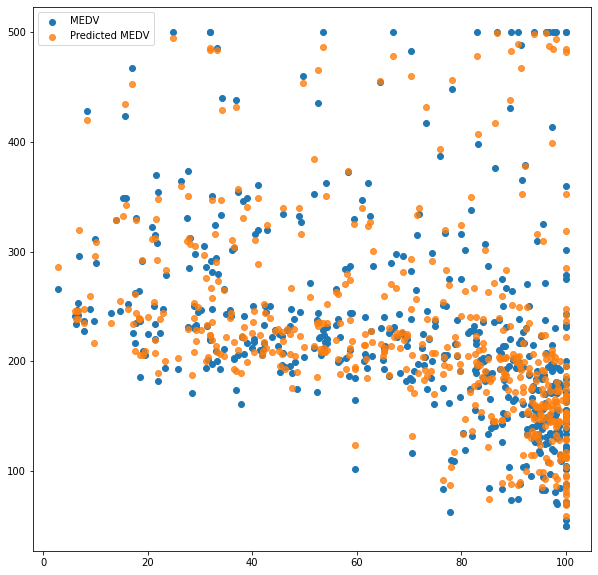

In [ ]:
x = data.drop('MEDV', axis=1)
y = data['MEDV']

best_model = GradientBoostingRegressor(learning_rate=0.05, random_state=100, n_estimators=200, criterion='mse')
best_model.fit(x,y)

y_pred = best_model.predict(x)
score = best_model.score(x,y)
print('R² score of GBR model', score)

# n°5 means 6th label of x : 'AGE'
plt.figure(figsize=(10,10))
plt.scatter(x.iloc[:,5], y, label='MEDV')
plt.scatter(x.iloc[:,5], y_pred, alpha=0.8, label='Predicted MEDV') 
plt.legend()


The plot above describe a comparison between predicted & true values of MEDV.
The score we had means that our model describes ~97% of Boston Housing price's (MEDV) variances. (when applied on 'AGE' label)

(array([0.04974439, 0.05465741, 0.04851613, 0.04298898, 0.04298898,
        0.02088036, 0.01658146, 0.01289669, 0.00552715, 0.00552715,
        0.00491303, 0.00184238, 0.00245651, 0.        , 0.        ,
        0.        , 0.00061413, 0.        , 0.        , 0.00061413]),
 array([1.95818664e-02, 3.23761436e+00, 6.45564685e+00, 9.67367935e+00,
        1.28917118e+01, 1.61097443e+01, 1.93277768e+01, 2.25458093e+01,
        2.57638418e+01, 2.89818743e+01, 3.21999068e+01, 3.54179393e+01,
        3.86359718e+01, 4.18540043e+01, 4.50720368e+01, 4.82900693e+01,
        5.15081018e+01, 5.47261343e+01, 5.79441668e+01, 6.11621993e+01,
        6.43802317e+01]),
 <a list of 20 Patch objects>)

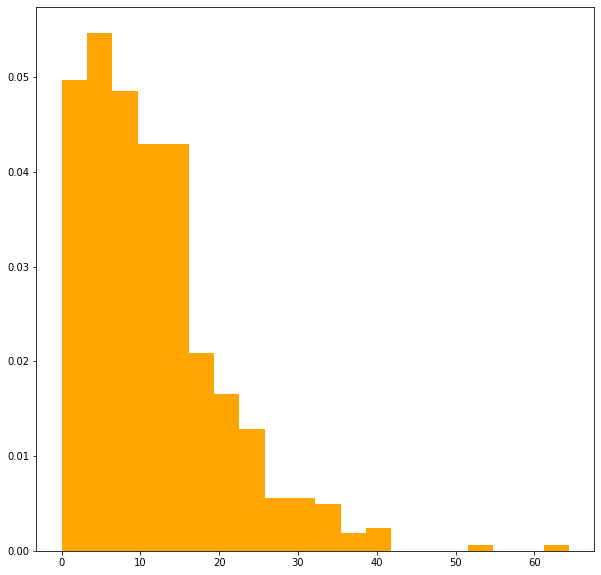

In [ ]:
plt.figure(figsize=(10,10))
err_hist = np.abs(y - y_pred)
plt.hist(err_hist, bins=20, color='orange', )

Here above an histogram of our model's errors :
A quick lecture of this plot :
* 80 of our model's predictions have none errors,
* 90 of our model's predictions have errors of 5(k$)..etc
* This models follows an exponential distribution like huh ?!

#4. Conclusion

* I thought that the best model was the random forest regressor, but after comparing to other additionnal regressors, we saw that there's other ones much more accurate (bagging, gradient boosting...etc).

* The GradientBoost regressor seems the best one in terms of accuracy though its averaging in complexity.

* From this project, we saw many from basic to more advanced data science aspects.

* The boosting/tuning is very useful to increase the accuracy of the prediction's model.

* Though the dataset we used is very tiny, we also saw that we can do wonders & explore it more & more either through processing, visualization, modelization & boosting/tuning. That's why this is interesting to explore more data & learn more techniques to not only perform in data science, but also to understand the world data that surround us & the amazing AI concepts we could build from it.

#5. References
* [RandomForestRegressor visualization](https://towardsdatascience.com/4-ways-to-visualize-individual-decision-trees-in-a-random-forest-7a9beda1d1b7)

* [XGboost](https://www.programmersought.com/article/4075217269/)

* [Regressions](https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d)

* [SettingCopyWarning](https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas)

* [Plotly offline/display issue](https://colab.research.google.com/github/binnisb/blog/blob/master/_notebooks/2020-04-02-Plotly-in-lab.ipynb#scrollTo=p7TWbm4qT7tj)

* My previous projects/Courses

In [ ]:
# To generate a local html page from this notebook
%%shell
jupyter nbconvert --to html /content/Final_Project.ipynb

[NbConvertApp] Converting notebook /content/Final_Project.ipynb to html
[NbConvertApp] Writing 5020606 bytes to /content/Final_Project.html
